<a href="https://colab.research.google.com/github/Anup8777/TensorFlow_DeepLearning/blob/master/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Optimizers

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import sys

In [2]:
train_images, test_images = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print('Maximum Pixel value tarining',train_images[0].max(), 'Minimum Pixel values', train_images[0].min())
n_classes = len(np.unique(train_images[-1]))
print('Uniques labels and number of labels are:', np.unique(train_images[-1]), 'and', n_classes)

Maximum Pixel value tarining 255 Minimum Pixel values 0
Uniques labels and number of labels are: [0 1 2 3 4 5 6 7 8 9] and 10


In [4]:
images, labels = train_images
images = (images/255.0)
images = images.astype(np.float32)
labels = labels.astype(np.int32)

input_shape = images[0].shape
n_channels = input_shape[-1]

dataset = tf.data.Dataset.from_tensor_slices((images, labels))

# Creating the data batches

ds = dataset.shuffle(5000).batch(64)
ds

<BatchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.int32)>

In [5]:
model_1 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=input_shape,
    pooling='max',
    classes=n_classes
)

model_2 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=input_shape,
    pooling='max',
    classes=n_classes
)

model_3 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=input_shape,
    pooling='max',
    classes=n_classes
)

In [6]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.2,
                              patience=5, min_lr=0.001)

In [7]:
opt1 = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
opt2 = tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD')
opt3 = tf.keras.optimizers.RMSprop(learning_rate=0.01, name='RMSprop')

opt = [opt1, opt2, opt3]
history = []
models = [model_1, model_2, model_3]

loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [8]:
for i in range(0, len(opt)):
  models[i].compile(optimizer=opt[i], loss = loss, metrics=['accuracy'] )
  history.append(models[i].fit(ds, epochs=30, verbose=1, callbacks=reduce_lr, use_multiprocessing=True))
  print('******** New Optimiser with a New Model',models[i], i, '*********')

Epoch 1/30
782/782 [==============================] - 34s 44ms/step - loss: 2.7585 - accuracy: 0.1953 - lr: 0.0100
Epoch 2/30
782/782 [==============================] - 36s 45ms/step - loss: 1.6827 - accuracy: 0.3743 - lr: 0.0100
Epoch 3/30
782/782 [==============================] - 36s 46ms/step - loss: 1.4743 - accuracy: 0.4636 - lr: 0.0100
Epoch 4/30
782/782 [==============================] - 35s 45ms/step - loss: 1.3291 - accuracy: 0.5198 - lr: 0.0100
Epoch 5/30
782/782 [==============================] - 36s 46ms/step - loss: 1.2476 - accuracy: 0.5547 - lr: 0.0100
Epoch 6/30
782/782 [==============================] - 36s 46ms/step - loss: 1.2621 - accuracy: 0.5521 - lr: 0.0100
Epoch 7/30
782/782 [==============================] - 35s 45ms/step - loss: 1.1230 - accuracy: 0.6035 - lr: 0.0100
Epoch 8/30
782/782 [==============================] - 35s 45ms/step - loss: 0.9741 - accuracy: 0.6598 - lr: 0.0100
Epoch 9/30
782/782 [==============================] - 35s 45ms/step - loss: 0.89

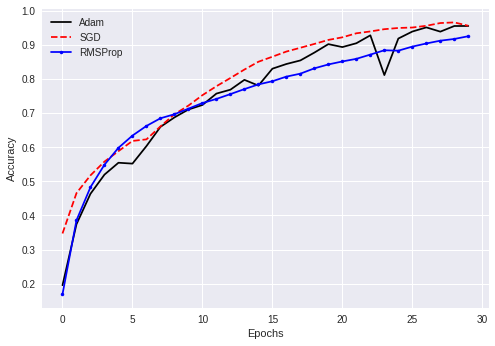

In [9]:
plt.style.use('seaborn')
plt.plot(history[0].history['accuracy'], '-k', label='Adam')
plt.plot(history[1].history['accuracy'], '--r',  label='SGD')
plt.plot(history[2].history['accuracy'], '.-b', label='RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

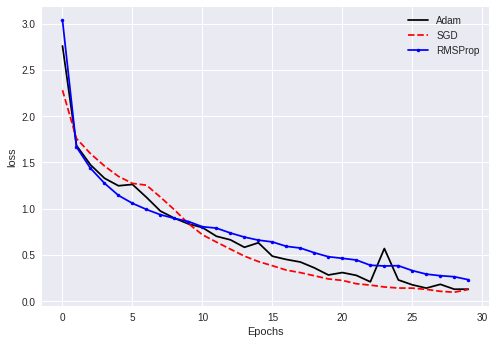

In [10]:
plt.plot(history[0].history['loss'], '-k', label='Adam')
plt.plot(history[1].history['loss'], '--r',  label='SGD')
plt.plot(history[2].history['loss'], '.-b', label='RMSProp')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best')

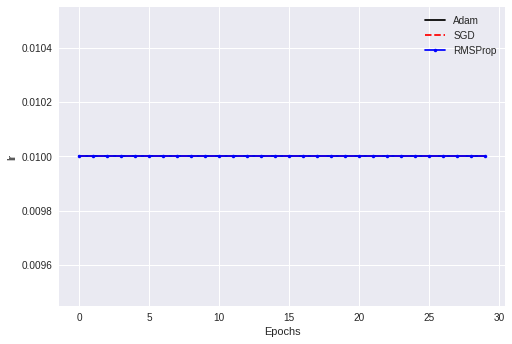

In [11]:
plt.plot(history[0].history['lr'], '-k', label='Adam')
plt.plot(history[1].history['lr'], '--r',  label='SGD')
plt.plot(history[2].history['lr'], '.-b', label='RMSProp')
plt.xlabel('Epochs')
plt.ylabel('lr')
plt.legend(loc='best')

In [14]:
test_acc = []
for i in range(0, len(opt)):
  test_acc.append( models[i].evaluate(
    x=test_images[0],
    y=test_images[1],
    batch_size=32,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
  ))

313/313 [==============================] - 3s 9ms/step - loss: 72017248.0000 - accuracy: 0.1000


In [15]:
test_acc

[[23865.998046875, 0.10000000149011612],
 [125491.1875, 0.10000000149011612],
 [72017248.0, 0.10000000149011612]]

In [19]:
os.chdir('/content/drive/My Drive/IDL Project')
model_1.save('/content/drive/My Drive/IDL Project/model_1.h5')
model_2.save('/content/drive/My Drive/IDL Project/model_2.h5')
model_3.save('/content/drive/My Drive/IDL Project/model_3.h5')